In [251]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display

import os
import sys
import importlib

sys.path.insert(0, "..")

import draughts
import board
import preprocessing
import engine

importlib.reload(draughts);
importlib.reload(board);
importlib.reload(preprocessing);
importlib.reload(engine);

In [252]:
import draughts

board = draughts.Board()
board

. o . o . o . o
o . o . o . o .
. o . o . o . o
. . . . . . . .
. . . . . . . .
O . O . O . O .
. O . O . O . O
O . O . O . O .

In [253]:
board.push("e3d4", "d6e5", "c3b4", "e5c3", "c3a5")

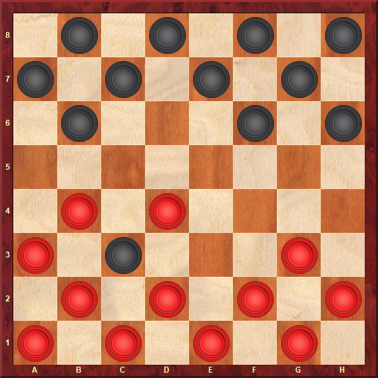

In [259]:
board.show()

In [258]:
board.engine._move_stack

[[Move( e3d4 )], [Move( d6e5 )], [Move( c3b4 )]]

In [256]:
board.undo()

In [257]:
board.valid_moves()

(Move( a3b4 ),
 Move( g3f4 ),
 Move( g3h4 ),
 Move( b2c3 ),
 Move( d2c3 ),
 Move( d2e3 ),
 Move( f2e3 ))